<a href="https://colab.research.google.com/github/KunalParkhade/eCommerce-Zeotap/blob/main/Kunal_Parkhade_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load Data
customers = pd.read_csv("/content/drive/MyDrive/ZeoTap/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/ZeoTap/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ZeoTap/Transactions.csv")

In [31]:
# Merging Datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [32]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Text(0, 0.5, 'DB Index')

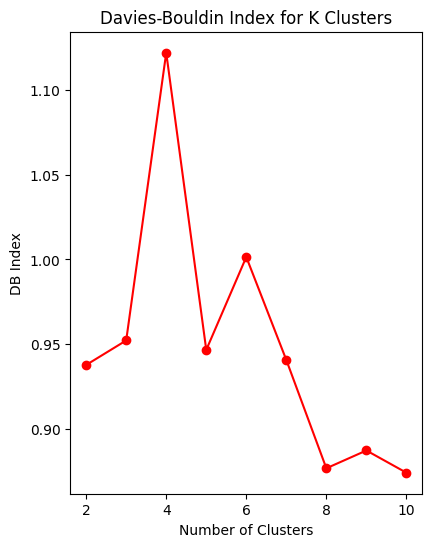

In [33]:
# Data Preparation
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',        # Total spending by the customer
    'Quantity': 'sum',          # Total quantity purchased by the customer
    'Price_x': 'mean'           # Average transaction price
}).reset_index()

# Rename the column for clarity
customer_features.rename(columns={'Price_x': 'AverageTransactionPrice'}, inplace=True)

# Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

# Clustering Analysis: Evaluate DB Index and Silhouette Score for different values of K
db_scores = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    db_scores.append(davies_bouldin_score(scaled_features, kmeans.labels_))
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot DB Index
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Index for K Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

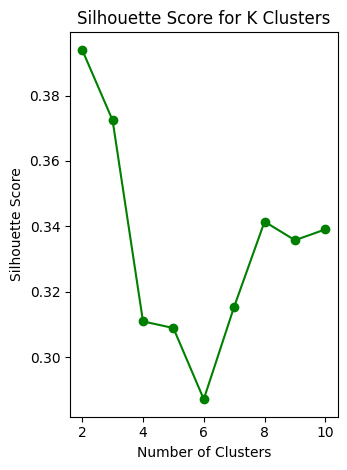

In [34]:
# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g')
plt.title('Silhouette Score for K Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [35]:
# Determine Optimal K based on Davies-Bouldin Index and Silhouette Score
optimal_k_db = db_scores.index(min(db_scores)) + 2
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

In [36]:
print(f"Optimal K based on DB Index: {optimal_k_db}")
print(f"Optimal K based on Silhouette Score: {optimal_k_silhouette}")

Optimal K based on DB Index: 10
Optimal K based on Silhouette Score: 2


In [37]:
# Clustering with Optimal K (using DB Index result)
final_kmeans = KMeans(n_clusters=optimal_k_db, random_state=42)
customer_features['Cluster'] = final_kmeans.fit_predict(scaled_features)

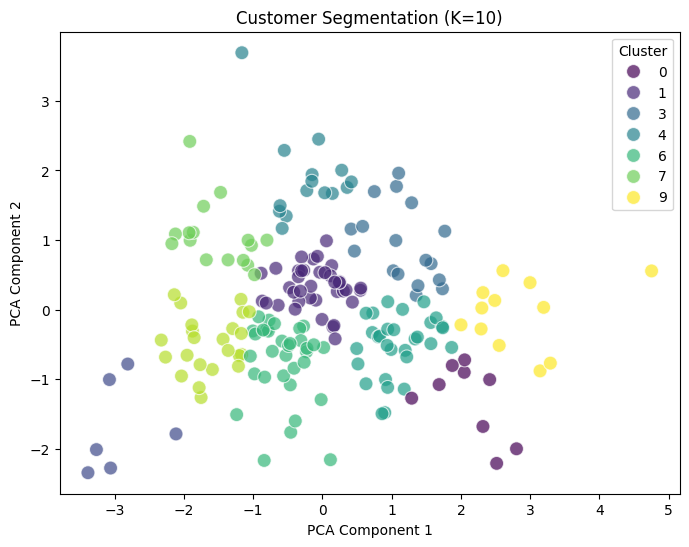

In [38]:
# Visualizing Clusters using PCA for 2D representation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title(f'Customer Segmentation (K={optimal_k_db})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [39]:
# Save Results
customer_features.to_csv("Kunal_Parkhade_Clustering_Results.csv", index=False)